In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.drop(['Outcome'],axis=1)
y = data.loc[:,'Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


logistic regression model

In [3]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X,y)

LogisticRegression(max_iter=1000)

Score model

In [4]:
y_predict = model1.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)


0.78125


Data normalization

In [5]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Calculate the mean and standard deviation

In [6]:
x1_mean = X.loc[:,'Glucose'].mean()
x1_norm_mean = X_norm[:,1].mean()
x1_sigma = X.loc[:,'Glucose'].std()
x1_norm_sigma = X_norm[:,1].std()
print('x1_mean',x1_mean)
print('x1_sigma',x1_sigma)
print('x1_norm_mean',x1_norm_mean)
print('x1_norm_sigma',x1_norm_sigma)

x1_mean 120.89453125
x1_sigma 31.97261819513622
x1_norm_mean -9.25185853854297e-18
x1_norm_sigma 1.0


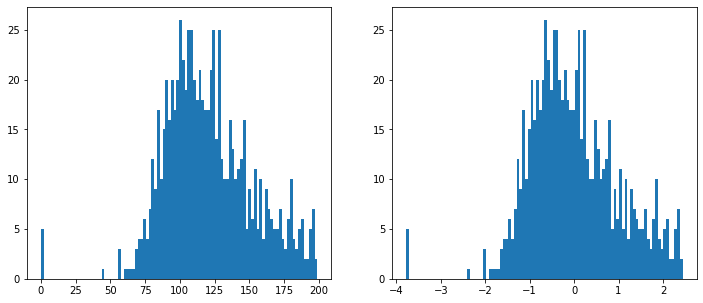

In [7]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(12,5))
fig1_1 = plt.subplot(121)
plt.hist(X.loc[:,'Glucose'],bins=100)
 
fig1_2 = plt.subplot(122)
plt.hist(X_norm[:,1],bins=100)
plt.show()

Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_norm)

Calculate the variance and variance ratio of each component after analysis

In [9]:
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print('var:',var)
print('var_ratio:',var_ratio)
print(sum(var_ratio))

var: [2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]
var_ratio: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]
1.0


Visualize the variance ratio

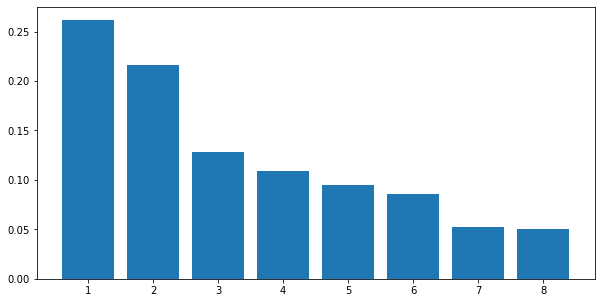

In [10]:
fig2 = plt.figure(figsize=(10,5))
plt.bar([1,2,3,4,5,6,7,8],var_ratio)
plt.show()

Data reduction to 2 dimensions

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
print(X_pca.shape,X_norm.shape)

(768, 2) (768, 8)


Calculate the variance ratio

In [12]:
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)

[0.26179749 0.21640127]


Visualization of dimensionality reduction data

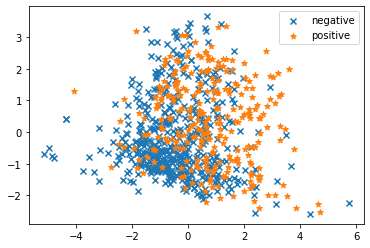

In [13]:
fig3 = plt.figure()
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0],marker='x',label='negative')
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1],marker='*',label='positive')
plt.legend()
plt.show()

Train the dimensionality model

In [16]:
model2 = LogisticRegression()
model2.fit(X_pca,y)
# predict and score
y_predict_pca = model2.predict(X_pca)
accuracy_pca = accuracy_score(y,y_predict_pca)
print(accuracy_pca)

0.71875
